In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

C:\Users\mattt\AppData\Local\Temp\ipykernel_8220\3440330333.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
order_list = pd.read_csv(r'C:\Users\mattt\Documents\Spring 2024\STAT 4188\shipping_project\Dataset\Supply chain logisitcs problem - OrderList.csv', sep=',', encoding='ISO-8859-1')
freight_rates = pd.read_csv(r'C:\Users\mattt\Documents\Spring 2024\STAT 4188\shipping_project\Dataset\Supply chain logisitcs problem - FreightRates.csv', sep=',', encoding='ISO-8859-1')
wh_costs = pd.read_csv(r'C:\Users\mattt\Documents\Spring 2024\STAT 4188\shipping_project\Dataset\Supply chain logisitcs problem - WhCosts.csv', sep=',', encoding='ISO-8859-1')
wh_capacities = pd.read_csv(r'C:\Users\mattt\Documents\Spring 2024\STAT 4188\shipping_project\Dataset\Supply chain logisitcs problem - WhCapacities.csv', sep=',', encoding='ISO-8859-1')
products_per_plant = pd.read_csv(r'C:\Users\mattt\Documents\Spring 2024\STAT 4188\shipping_project\Dataset\Supply chain logisitcs problem - ProductsPerPlant.csv', sep=',', encoding='ISO-8859-1')
vmi_customers = pd.read_csv(r'C:\Users\mattt\Documents\Spring 2024\STAT 4188\shipping_project\Dataset\Supply chain logisitcs problem - VmiCustomers.csv', sep=',', encoding='ISO-8859-1')
plant_ports = pd.read_csv(r'C:\Users\mattt\Documents\Spring 2024\STAT 4188\shipping_project\Dataset\Supply chain logisitcs problem - PlantPorts.csv', sep=',', encoding='ISO-8859-1')



In [3]:
#sample the OrderList data table
#order_list = order_list.sample(frac = 0.2)

In [4]:
order_list.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1447296447,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1447158015,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1447138899,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1447363528,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1447363981,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [5]:
#Left_join = pd.merge(order_list,  
#                      products_per_plant,  
#                      on ='Product ID', 
#                      how ='left') 


In [6]:
#Left_join.head(50)

In [7]:
#join_products_plants = pd.merge(products_per_plant, plant_ports, on = 'Plant Code', how = 'right')

In [8]:
#join_products_plants.head()

In [9]:
#join_all = pd.merge(order_list, join_products_plants, on = 'Plant Code', how = 'right')

In [10]:
#join_all = join_all.dropna(axis = 0)

In [11]:
#join_all.head(10)

In [12]:
order_ports = []
order_id = []

#for i in range (0, join_all.shape[0]):
#    order_id.append(join_all['Order ID'].loc[join_all.index[i]])

In [13]:
#order_id

In [14]:
order_ports.append(order_id)

In [15]:
order_list_simplified = order_list.drop(['Order Date', 'TPT', 'Service Level', 'Ship ahead day count', 'Ship Late Day count', 'Customer', 'Destination Port'], axis = 1)

Clean the data table 'Freight Rates'

In [16]:
def rate_remove_symbols(string):
    if isinstance(string, str):
        return string.replace("$", "")

In [17]:
def convert_to_float(string):
    if isinstance(string, str):
        return float(string)

In [18]:
freight_rates['rate'] = freight_rates['rate'].apply(rate_remove_symbols)
freight_rates['rate'] = freight_rates['rate'].apply(convert_to_float)

In [19]:
freight_rates

,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,$ 43.23,0.71,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,$ 43.23,0.75,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,$ 43.23,0.79,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,$ 43.23,0.83,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,$ 43.23,1.06,AIR,2,V88888888_0
...,...,...,...,...,...,...,...,...,...,...,...
1535,V444_8,PORT03,PORT09,0.0,99.99,DTD,$ 29.34,0.41,AIR,0,V88888888_0
1536,V444_8,PORT03,PORT09,500.0,1999.99,DTD,$ 29.34,0.31,AIR,0,V88888888_0
1537,V444_8,PORT03,PORT09,250.0,499.99,DTD,$ 29.34,0.41,AIR,0,V88888888_0
1538,V444_8,PORT03,PORT09,2000.0,99999.99,DTD,$ 29.34,0.31,AIR,0,V88888888_0


In [20]:
#freight_rates_simplified = freight_rates.groupby('Carrier').max().reset_index()

In [21]:
freight_rates_simplified = freight_rates.drop(['dest_port_cd', 'minm_wgh_qty', 'max_wgh_qty', 'svc_cd', 'minimum cost', 'mode_dsc', 'tpt_day_cnt', 'Carrier type'], axis = 1)

In [22]:
freight_rates_simplified

,Carrier,orig_port_cd,rate
0,V444_6,PORT08,0.71
1,V444_6,PORT08,0.75
2,V444_6,PORT08,0.79
3,V444_6,PORT08,0.83
4,V444_6,PORT08,1.06
...,...,...,...
1535,V444_8,PORT03,0.41
1536,V444_8,PORT03,0.31
1537,V444_8,PORT03,0.41
1538,V444_8,PORT03,0.31


In [23]:
#order_list_freight_rates = pd.merge(order_list_simplified, freight_rates, how = 'outer')

In [24]:
order_list_simplified

,Order ID,Origin Port,Carrier,Product ID,Plant Code,Unit quantity,Weight
0,1447296447,PORT09,V44_3,1700106,PLANT16,808,14.300000
1,1447158015,PORT09,V44_3,1700106,PLANT16,3188,87.940000
2,1447138899,PORT09,V44_3,1700106,PLANT16,2331,61.200000
3,1447363528,PORT09,V44_3,1700106,PLANT16,847,16.160000
4,1447363981,PORT09,V44_3,1700106,PLANT16,2163,52.340000
...,...,...,...,...,...,...,...
9210,1447305023,PORT04,V444_1,1683388,PLANT03,339,2.354118
9211,1447318797,PORT04,V444_1,1683388,PLANT03,339,2.354118
9212,1447322252,PORT04,V444_1,1683388,PLANT03,245,0.294265
9213,1447145319,PORT04,V444_1,1683430,PLANT03,278,2.480000


In [25]:
#every possible freight
order_list_freight_rates = pd.merge(order_list_simplified, freight_rates_simplified, how = 'cross')
order_list_freight_rates = pd.merge(order_list_freight_rates, wh_costs, left_on = 'Plant Code', right_on = 'WH')
order_list_freight_rates = order_list_freight_rates.drop('WH', axis = 1)

In [26]:
#order_list_freight_rates = order_list_freight_rates.dropna()

In [27]:
order_list_freight_rates

,Order ID,Origin Port,Carrier_x,Product ID,Plant Code,Unit quantity,Weight,Carrier_y,orig_port_cd,rate,Cost/unit
0,1447296447,PORT09,V44_3,1700106,PLANT16,808,14.30,V444_6,PORT08,0.71,1.92
1,1447296447,PORT09,V44_3,1700106,PLANT16,808,14.30,V444_6,PORT08,0.75,1.92
2,1447296447,PORT09,V44_3,1700106,PLANT16,808,14.30,V444_6,PORT08,0.79,1.92
3,1447296447,PORT09,V44_3,1700106,PLANT16,808,14.30,V444_6,PORT08,0.83,1.92
4,1447296447,PORT09,V44_3,1700106,PLANT16,808,14.30,V444_6,PORT08,1.06,1.92
...,...,...,...,...,...,...,...,...,...,...,...
14191095,1447328131,PORT04,V444_1,1683424,PLANT03,317,1.96,V444_8,PORT03,0.41,0.52
14191096,1447328131,PORT04,V444_1,1683424,PLANT03,317,1.96,V444_8,PORT03,0.31,0.52
14191097,1447328131,PORT04,V444_1,1683424,PLANT03,317,1.96,V444_8,PORT03,0.41,0.52
14191098,1447328131,PORT04,V444_1,1683424,PLANT03,317,1.96,V444_8,PORT03,0.31,0.52


In [28]:
order_list_freight_rates['Total Freight Cost'] = order_list_freight_rates['Unit quantity'] * order_list_freight_rates['rate']
order_list_freight_rates['Total Warehouse Cost'] = order_list_freight_rates['Unit quantity'] * order_list_freight_rates['Cost/unit']
order_list_freight_rates['Total Cost'] = order_list_freight_rates['Total Freight Cost'] + order_list_freight_rates['Total Warehouse Cost']

In [29]:
order_list_freight_rates

,Order ID,Origin Port,Carrier_x,Product ID,Plant Code,Unit quantity,Weight,Carrier_y,orig_port_cd,rate,Cost/unit,Total Freight Cost,Total Warehouse Cost,Total Cost
0,1447296447,PORT09,V44_3,1700106,PLANT16,808,14.30,V444_6,PORT08,0.71,1.92,573.68,1551.36,2125.04
1,1447296447,PORT09,V44_3,1700106,PLANT16,808,14.30,V444_6,PORT08,0.75,1.92,606.00,1551.36,2157.36
2,1447296447,PORT09,V44_3,1700106,PLANT16,808,14.30,V444_6,PORT08,0.79,1.92,638.32,1551.36,2189.68
3,1447296447,PORT09,V44_3,1700106,PLANT16,808,14.30,V444_6,PORT08,0.83,1.92,670.64,1551.36,2222.00
4,1447296447,PORT09,V44_3,1700106,PLANT16,808,14.30,V444_6,PORT08,1.06,1.92,856.48,1551.36,2407.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191095,1447328131,PORT04,V444_1,1683424,PLANT03,317,1.96,V444_8,PORT03,0.41,0.52,129.97,164.84,294.81
14191096,1447328131,PORT04,V444_1,1683424,PLANT03,317,1.96,V444_8,PORT03,0.31,0.52,98.27,164.84,263.11
14191097,1447328131,PORT04,V444_1,1683424,PLANT03,317,1.96,V444_8,PORT03,0.41,0.52,129.97,164.84,294.81
14191098,1447328131,PORT04,V444_1,1683424,PLANT03,317,1.96,V444_8,PORT03,0.31,0.52,98.27,164.84,263.11


In [30]:
#from sklearn import tree

In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 

In [32]:
# plotting a scatterplot 
#sns.scatterplot(x='Order ID', 
#				y='Unit quantity', data=order_list) 

Encoding, assigning each categorical variable to a number

In [33]:
def encode_carrier(str):
    return float(str[5])

In [34]:
order_list_freight_rates = order_list_freight_rates.drop('Carrier_x', axis = 1)

In [35]:
order_list_freight_rates['Carrier_y'] = order_list_freight_rates['Carrier_y'].apply(encode_carrier)

In [36]:
order_list_freight_rates

,Order ID,Origin Port,Product ID,Plant Code,Unit quantity,Weight,Carrier_y,orig_port_cd,rate,Cost/unit,Total Freight Cost,Total Warehouse Cost,Total Cost
0,1447296447,PORT09,1700106,PLANT16,808,14.30,6.0,PORT08,0.71,1.92,573.68,1551.36,2125.04
1,1447296447,PORT09,1700106,PLANT16,808,14.30,6.0,PORT08,0.75,1.92,606.00,1551.36,2157.36
2,1447296447,PORT09,1700106,PLANT16,808,14.30,6.0,PORT08,0.79,1.92,638.32,1551.36,2189.68
3,1447296447,PORT09,1700106,PLANT16,808,14.30,6.0,PORT08,0.83,1.92,670.64,1551.36,2222.00
4,1447296447,PORT09,1700106,PLANT16,808,14.30,6.0,PORT08,1.06,1.92,856.48,1551.36,2407.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191095,1447328131,PORT04,1683424,PLANT03,317,1.96,8.0,PORT03,0.41,0.52,129.97,164.84,294.81
14191096,1447328131,PORT04,1683424,PLANT03,317,1.96,8.0,PORT03,0.31,0.52,98.27,164.84,263.11
14191097,1447328131,PORT04,1683424,PLANT03,317,1.96,8.0,PORT03,0.41,0.52,129.97,164.84,294.81
14191098,1447328131,PORT04,1683424,PLANT03,317,1.96,8.0,PORT03,0.31,0.52,98.27,164.84,263.11


Regression Model

In [37]:
# creating feature variables 

#all columns besides the column associated to the dependent variable
#this X is a vector
#X = order_list_freight_rates.drop('Total Cost', axis=1) 
#y = order_list_freight_rates['Total Cost'] 
  
#print(X) 
#print(y) 
  
# creating train and test sets 
#X_train, X_test, y_train, y_test = train_test_split( 
#    X, y, test_size=0.3, random_state=101) 
  
#model = LinearRegression() 
#model.fit(X_train, y_train) 
  
# making predictions 
#predictions = model.predict(X_test) 

In [38]:
#print('Mean squared_error : ', mean_squared_error(y_test, predictions)) 
#print('Mean absolute_error : ', mean_absolute_error(y_test, predictions)) 

Selecting the minimum from each

In [39]:
minimum_cost_freight = order_list_freight_rates.groupby('Order ID')['Total Cost'].idxmin()
minimum_cost_rows = order_list_freight_rates.loc[minimum_cost_freight].reset_index()

#minimum_cost_rows.head(50)

In [40]:
minimum_cost_freight

Order ID
1447125806     6974698
1447132026     8426918
1447133055     3494298
1447133165     6147718
1447133210     6269378
                ...   
1447425026    10127078
1447425027    10076258
1447425028    10090118
1447425029    10123998
1447425231    12175278
Name: Total Cost, Length: 9215, dtype: int64

<Axes: xlabel='Order ID', ylabel='Carrier_y'>

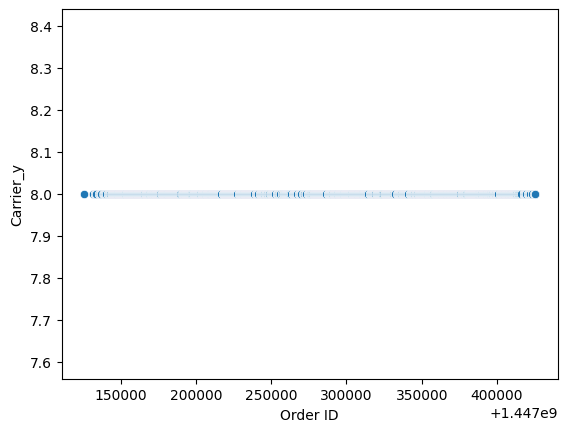

In [41]:
sns.scatterplot(x='Order ID', 
				y='Carrier_y', data=minimum_cost_rows) 

In [42]:
order_list_freight_rates

,Order ID,Origin Port,Product ID,Plant Code,Unit quantity,Weight,Carrier_y,orig_port_cd,rate,Cost/unit,Total Freight Cost,Total Warehouse Cost,Total Cost
0,1447296447,PORT09,1700106,PLANT16,808,14.30,6.0,PORT08,0.71,1.92,573.68,1551.36,2125.04
1,1447296447,PORT09,1700106,PLANT16,808,14.30,6.0,PORT08,0.75,1.92,606.00,1551.36,2157.36
2,1447296447,PORT09,1700106,PLANT16,808,14.30,6.0,PORT08,0.79,1.92,638.32,1551.36,2189.68
3,1447296447,PORT09,1700106,PLANT16,808,14.30,6.0,PORT08,0.83,1.92,670.64,1551.36,2222.00
4,1447296447,PORT09,1700106,PLANT16,808,14.30,6.0,PORT08,1.06,1.92,856.48,1551.36,2407.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191095,1447328131,PORT04,1683424,PLANT03,317,1.96,8.0,PORT03,0.41,0.52,129.97,164.84,294.81
14191096,1447328131,PORT04,1683424,PLANT03,317,1.96,8.0,PORT03,0.31,0.52,98.27,164.84,263.11
14191097,1447328131,PORT04,1683424,PLANT03,317,1.96,8.0,PORT03,0.41,0.52,129.97,164.84,294.81
14191098,1447328131,PORT04,1683424,PLANT03,317,1.96,8.0,PORT03,0.31,0.52,98.27,164.84,263.11


In [43]:
plant_ports

,Plant Code,Port
0,PLANT01,PORT01
1,PLANT01,PORT02
2,PLANT02,PORT03
3,PLANT03,PORT04
4,PLANT04,PORT05
5,PLANT05,PORT06
6,PLANT06,PORT06
7,PLANT07,PORT01
8,PLANT07,PORT02
9,PLANT08,PORT04


In [44]:
#what does the groupby() function return?

plant_ports_group_by = plant_ports.groupby('Plant Code')

#the apply(list) function rewrites two separate rows 
#where the first column contains the same value and the second column contains two different values as the first column value and a list of the two different values
plant_ports_dict = plant_ports_group_by['Port'].apply(list).to_dict()
plant_ports_dict

{'PLANT01': ['PORT01', 'PORT02'],
 'PLANT02': ['PORT03'],
 'PLANT03': ['PORT04'],
 'PLANT04': ['PORT05'],
 'PLANT05': ['PORT06'],
 'PLANT06': ['PORT06'],
 'PLANT07': ['PORT01', 'PORT02'],
 'PLANT08': ['PORT04'],
 'PLANT09': ['PORT04'],
 'PLANT10': ['PORT01', 'PORT02'],
 'PLANT11': ['PORT04'],
 'PLANT12': ['PORT04'],
 'PLANT13': ['PORT04'],
 'PLANT14': ['PORT07'],
 'PLANT15': ['PORT08'],
 'PLANT16': ['PORT09'],
 'PLANT17': ['PORT10'],
 'PLANT18': ['PORT11'],
 'PLANT19': ['PORT04']}

In [45]:
#this is a merge approach
#however, an indexing approach may be possible instead
#this approach may not work. this is because more than one port can be associated to each plant

#order_list_freight_rates_merge = pd.merge(order_list_freight_rates, plant_ports, on = 'Plant Code', how = 'inner')

In [46]:
#order_list_freight_rates_merge

In [47]:
#def warehouse_port_agreement():
#    port_list = plant_ports_dict[order_list_freight_rates['Plant Code']]
#    for i in range(0, len(port_list)):
#        if order_list_freight_rates['orig_port_cd'] == port_list[i]:
#            return True
#    return False

def warehouse_port_agreement(plant_code):
    port_list = plant_ports_dict[plant_code['Plant Code']]
    #print(port_list)
    if len(port_list) != 1:
        for i in range(0, len(port_list) + 1):
            if plant_code['orig_port_cd'] == port_list[i]:
                #print(plant_code['orig_port_cd'])
                return True
    else:
        if plant_code['orig_port_cd'] == port_list[0]:
            return True
    return False

#warehouse_port_agreement_bool = warehouse_port_agreement()

#original code:
#def warehouse_port_agreement():
#    return order_list_freight_rates_merge['orig_port_cd'] == order_list_freight_rates_merge['Port']


In [48]:
#order_list_freight_rates_filter = order_list_freight_rates[warehouse_port_agreement_bool].reset_index()

order_list_freight_rates_filter = order_list_freight_rates.apply(warehouse_port_agreement, axis = 1)

In [49]:
order_list_freight_rates_filter = order_list_freight_rates[order_list_freight_rates_filter]

In [50]:
order_list_freight_rates_filter.head(50)

,Order ID,Origin Port,Product ID,Plant Code,Unit quantity,Weight,Carrier_y,orig_port_cd,rate,Cost/unit,Total Freight Cost,Total Warehouse Cost,Total Cost
38,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.03,1.92,24.24,1551.36,1575.60
39,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.03,1.92,24.24,1551.36,1575.60
40,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.03,1.92,24.24,1551.36,1575.60
41,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.03,1.92,24.24,1551.36,1575.60
42,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.03,1.92,24.24,1551.36,1575.60
88,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.05,1.92,40.40,1551.36,1591.76
89,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.05,1.92,40.40,1551.36,1591.76
90,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.05,1.92,40.40,1551.36,1591.76
91,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.05,1.92,40.40,1551.36,1591.76
92,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.05,1.92,40.40,1551.36,1591.76


In [51]:
minimum_cost_freight = order_list_freight_rates_filter.groupby('Order ID')['Total Cost'].idxmin()
minimum_cost_rows = order_list_freight_rates_filter.loc[minimum_cost_freight].reset_index()

minimum_cost_rows

,index,Order ID,Origin Port,Product ID,Plant Code,Unit quantity,Weight,Carrier_y,orig_port_cd,rate,Cost/unit,Total Freight Cost,Total Warehouse Cost,Total Cost
0,6974849,1447125806,PORT04,1660583,PLANT03,262,0.594476,0.0,PORT04,0.04,0.52,10.48,136.24,146.72
1,8427069,1447132026,PORT04,1667927,PLANT03,52742,30.405274,0.0,PORT04,0.04,0.52,2109.68,27425.84,29535.52
2,3494449,1447133055,PORT04,1678648,PLANT03,356,1.462970,0.0,PORT04,0.04,0.52,14.24,185.12,199.36
3,6147869,1447133165,PORT04,1668492,PLANT03,610,7.676667,0.0,PORT04,0.04,0.52,24.40,317.20,341.60
4,6269529,1447133210,PORT04,1683560,PLANT03,71330,670.588931,0.0,PORT04,0.04,0.52,2853.20,37091.60,39944.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,10127229,1447425026,PORT04,1660580,PLANT03,650,38.920000,0.0,PORT04,0.04,0.52,26.00,338.00,364.00
9211,10076409,1447425027,PORT04,1660580,PLANT03,507,20.243584,0.0,PORT04,0.04,0.52,20.28,263.64,283.92
9212,10090269,1447425028,PORT04,1660580,PLANT03,266,1.069088,0.0,PORT04,0.04,0.52,10.64,138.32,148.96
9213,10124149,1447425029,PORT04,1660580,PLANT03,498,28.120000,0.0,PORT04,0.04,0.52,19.92,258.96,278.88


<Axes: xlabel='Order ID', ylabel='Carrier_y'>

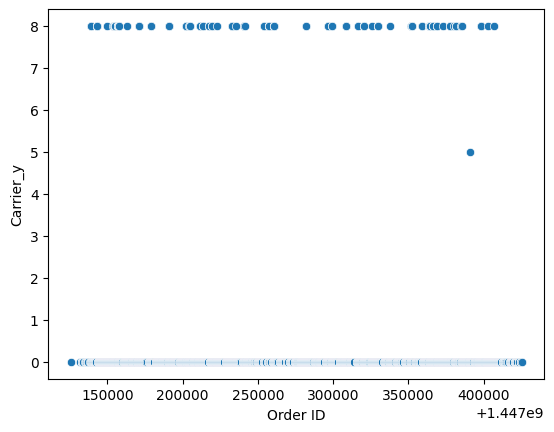

In [52]:
sns.scatterplot(x='Order ID', 
				y='Carrier_y', data=minimum_cost_rows) 

<Axes: xlabel='Order ID', ylabel='orig_port_cd'>

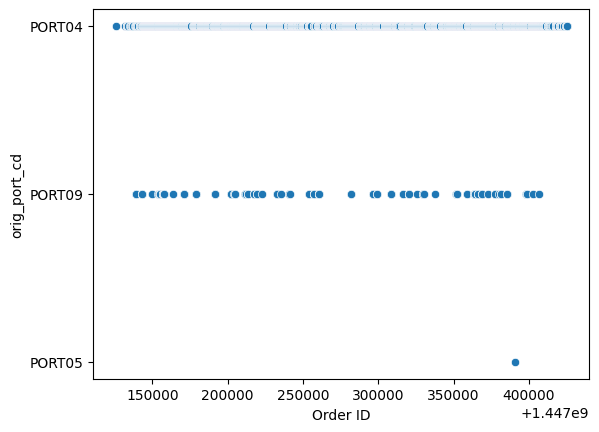

In [53]:
sns.scatterplot(x='Order ID', 
				y='orig_port_cd', data=minimum_cost_rows) 

<Axes: xlabel='Order ID', ylabel='Total Cost'>

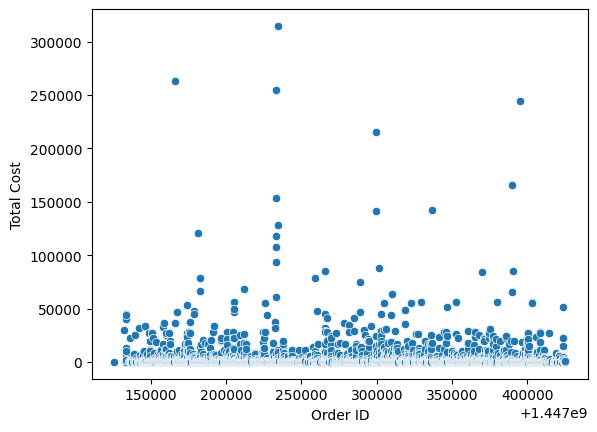

In [54]:
sns.scatterplot(x='Order ID', 
				y='Total Cost', data=minimum_cost_rows) 

<Axes: xlabel='Total Cost', ylabel='Carrier_y'>

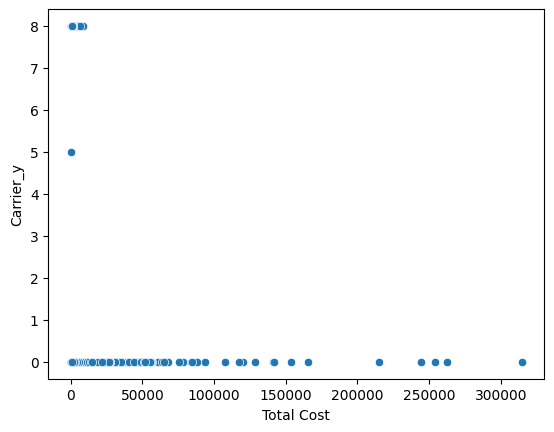

In [55]:
sns.scatterplot(x='Total Cost', 
				y='Carrier_y', data=minimum_cost_rows) 

<Axes: xlabel='Carrier_y', ylabel='orig_port_cd'>

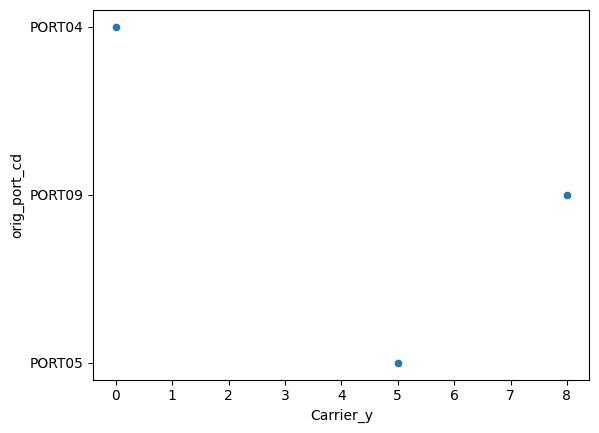

In [56]:
sns.scatterplot(x='Carrier_y', 
				y='orig_port_cd', data=minimum_cost_rows) 

#the carrier could also be 2, 3, 9?

<Axes: xlabel='Carrier', ylabel='orig_port_cd'>

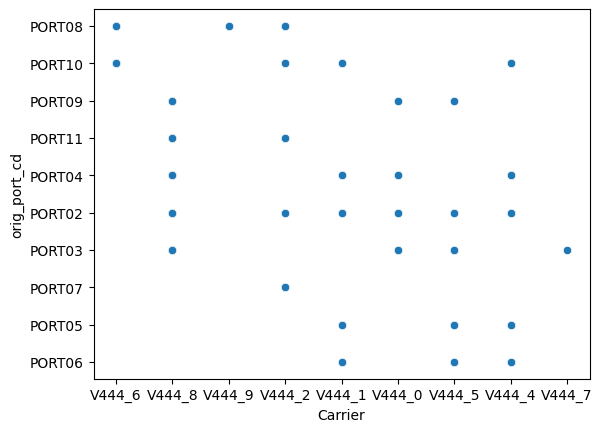

In [57]:
sns.scatterplot(x = 'Carrier', y = 'orig_port_cd', data = freight_rates)

In [58]:
def carrier_port_agreement(order_row):
    if order_row['Origin Port'] == order_row['orig_port_cd']:
            return True
    return False
    
order_list_freight_rates_filter_list = order_list_freight_rates_filter.apply(carrier_port_agreement, axis = 1)

order_list_freight_rates_filter_list

38          True
39          True
40          True
41          True
42          True
            ... 
14191085    True
14191086    True
14191087    True
14191088    True
14191089    True
Length: 2092842, dtype: bool

In [59]:
order_list_freight_rates_filter = order_list_freight_rates_filter[order_list_freight_rates_filter_list]

order_list_freight_rates_filter

,Order ID,Origin Port,Product ID,Plant Code,Unit quantity,Weight,Carrier_y,orig_port_cd,rate,Cost/unit,Total Freight Cost,Total Warehouse Cost,Total Cost
38,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.03,1.92,24.24,1551.36,1575.6
39,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.03,1.92,24.24,1551.36,1575.6
40,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.03,1.92,24.24,1551.36,1575.6
41,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.03,1.92,24.24,1551.36,1575.6
42,1447296447,PORT09,1700106,PLANT16,808,14.30,8.0,PORT09,0.03,1.92,24.24,1551.36,1575.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191085,1447328131,PORT04,1683424,PLANT03,317,1.96,8.0,PORT04,0.18,0.52,57.06,164.84,221.9
14191086,1447328131,PORT04,1683424,PLANT03,317,1.96,8.0,PORT04,0.18,0.52,57.06,164.84,221.9
14191087,1447328131,PORT04,1683424,PLANT03,317,1.96,8.0,PORT04,0.18,0.52,57.06,164.84,221.9
14191088,1447328131,PORT04,1683424,PLANT03,317,1.96,8.0,PORT04,0.18,0.52,57.06,164.84,221.9


In [60]:
minimum_cost_freight = order_list_freight_rates_filter.groupby('Order ID')['Total Cost'].idxmin()
minimum_cost_rows = order_list_freight_rates_filter.loc[minimum_cost_freight].reset_index()

minimum_cost_rows

,index,Order ID,Origin Port,Product ID,Plant Code,Unit quantity,Weight,Carrier_y,orig_port_cd,rate,Cost/unit,Total Freight Cost,Total Warehouse Cost,Total Cost
0,6974849,1447125806,PORT04,1660583,PLANT03,262,0.594476,0.0,PORT04,0.04,0.52,10.48,136.24,146.72
1,8427069,1447132026,PORT04,1667927,PLANT03,52742,30.405274,0.0,PORT04,0.04,0.52,2109.68,27425.84,29535.52
2,3494449,1447133055,PORT04,1678648,PLANT03,356,1.462970,0.0,PORT04,0.04,0.52,14.24,185.12,199.36
3,6147869,1447133165,PORT04,1668492,PLANT03,610,7.676667,0.0,PORT04,0.04,0.52,24.40,317.20,341.60
4,6269529,1447133210,PORT04,1683560,PLANT03,71330,670.588931,0.0,PORT04,0.04,0.52,2853.20,37091.60,39944.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,10127229,1447425026,PORT04,1660580,PLANT03,650,38.920000,0.0,PORT04,0.04,0.52,26.00,338.00,364.00
9211,10076409,1447425027,PORT04,1660580,PLANT03,507,20.243584,0.0,PORT04,0.04,0.52,20.28,263.64,283.92
9212,10090269,1447425028,PORT04,1660580,PLANT03,266,1.069088,0.0,PORT04,0.04,0.52,10.64,138.32,148.96
9213,10124149,1447425029,PORT04,1660580,PLANT03,498,28.120000,0.0,PORT04,0.04,0.52,19.92,258.96,278.88


<Axes: xlabel='Order ID', ylabel='Carrier_y'>

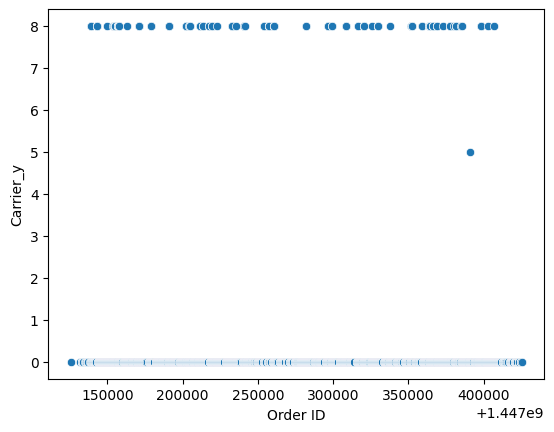

In [61]:
sns.scatterplot(x='Order ID', y='Carrier_y', data=minimum_cost_rows)

<Axes: xlabel='Order ID', ylabel='orig_port_cd'>

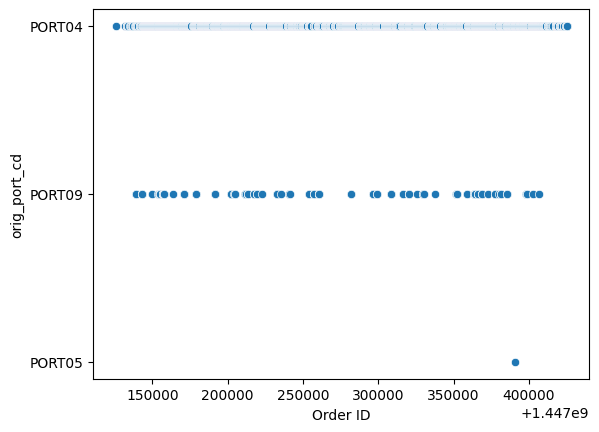

In [62]:
sns.scatterplot(x='Order ID', y='orig_port_cd', data=minimum_cost_rows) 

<Axes: xlabel='Order ID', ylabel='Total Cost'>

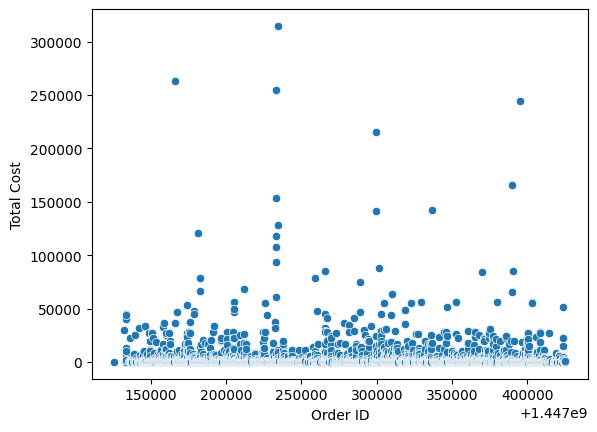

In [63]:
sns.scatterplot(x='Order ID', y='Total Cost', data=minimum_cost_rows) 

<Axes: xlabel='Total Cost', ylabel='Carrier_y'>

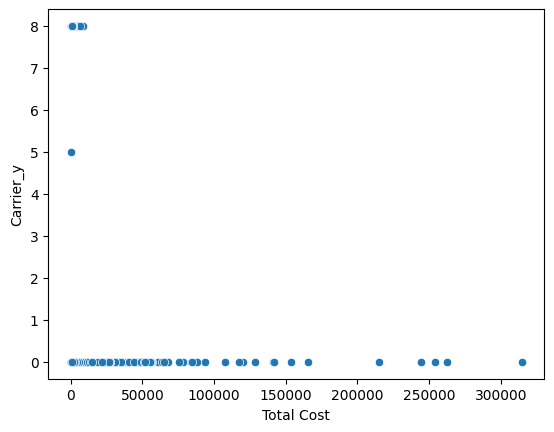

In [64]:
sns.scatterplot(x='Total Cost', y='Carrier_y', data=minimum_cost_rows) 

<Axes: xlabel='Carrier_y', ylabel='orig_port_cd'>

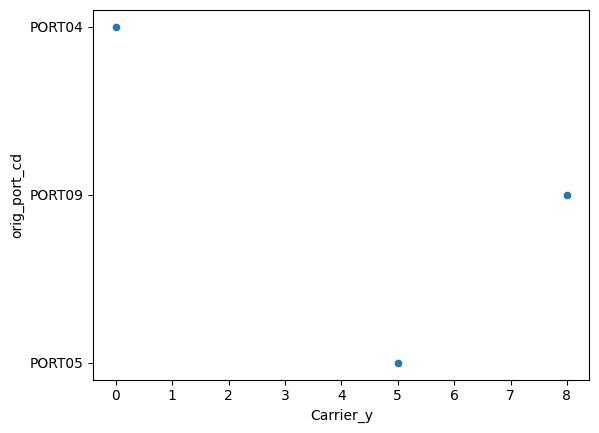

In [65]:
sns.scatterplot(x='Carrier_y', y='orig_port_cd', data=minimum_cost_rows) 

<Axes: xlabel='Carrier', ylabel='orig_port_cd'>

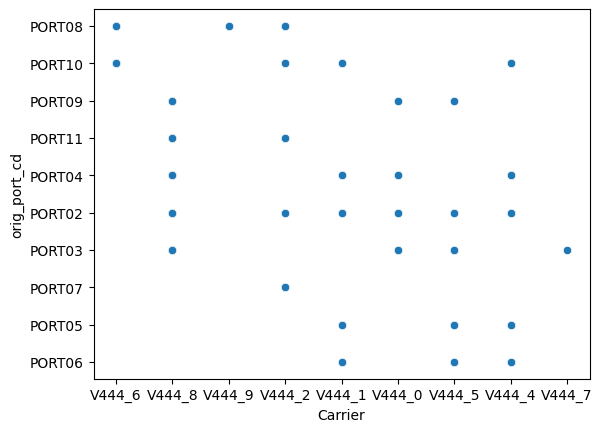

In [66]:
sns.scatterplot(x = 'Carrier', y = 'orig_port_cd', data = freight_rates)